#### **Enhancing Customer Experience and Boosting Sales in E-commerce**

Summary:
 - An e-commerce company sells products through its website and mobile app.
 - To make a purchase, a customer registers on the portal (using the website or app). 
 - Each time the customer logs in, the system records the time spent logged in, either on the app or on the website.
 - For each customer, the company keeps a record of sales with the total amount spent per month. 
 - The company would like to increase sales, but the budget allows investment only in the website or app at the moment.
 - The goal is to improve the customer experience during navigation in the system, increasing the time logged in, increasing engagement, and consequently increasing sales.

Note: In linear regression, we want the predictor variables to have a high correlation with the target variable. 
At the same time, we do not want a high correlation among the predictor variables between themselves

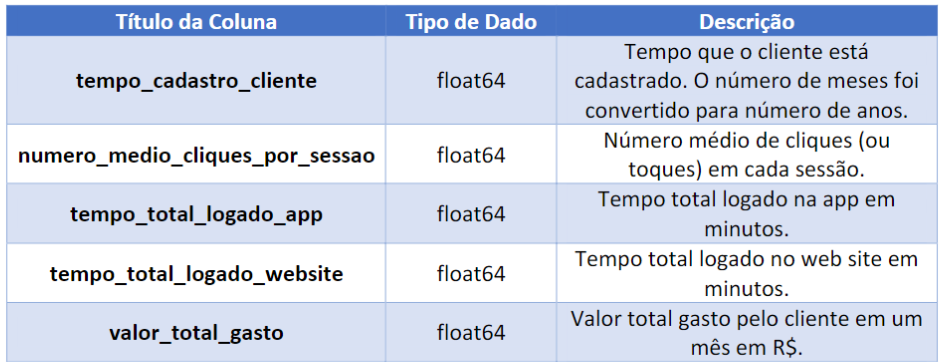

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn                                           # Usado para construir modelos de ML
from sklearn.model_selection import train_test_split     # Divide os dados em teste/treino
from sklearn.preprocessing import StandardScaler         # Permite padronização dos dados
from sklearn.linear_model import LinearRegression        # Serão 3 versões de algoritmos de regressão: LN, Ridge e Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score    # Calculam métricas do modelo
sns.set_style('whitegrid')                               # estilo dos gráficos do sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Carregando o dataset
dados = pd.read_csv('C:\DS\DSA-FCD\BigData-Python-Spark\Cap10\dados\dataset.csv')

In [3]:
# entendendo o dataset
print(dados.shape[0],' linhas')
print(dados.shape[1],' colunas')
print(50*'-')
dados.describe()

500  linhas
5  colunas
--------------------------------------------------


,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.533462,33.053194,12.052488,37.060445,499.314038
std,0.999278,0.992563,0.994216,1.010489,79.314782
min,0.269901,29.532429,8.508152,33.913847,256.670582
25%,2.930450,32.341822,11.388153,36.349257,445.038277
50%,3.533975,33.082008,11.983231,37.069367,498.887875
75%,4.126502,33.711985,12.753850,37.716432,549.313828
max,6.922689,36.139662,15.126994,40.005182,765.518462


In [4]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [5]:
dados.sample(5)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
60,4.343063,32.175501,13.387492,35.694175,588.712605
445,2.910531,32.215527,12.216855,36.953960,438.417742
61,2.820097,32.728360,13.104507,38.878041,491.073224
299,4.029454,35.530904,11.379257,36.636104,574.747220
325,1.809230,33.077731,11.466984,35.675728,374.269675


In [6]:
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


<AxesSubplot: >

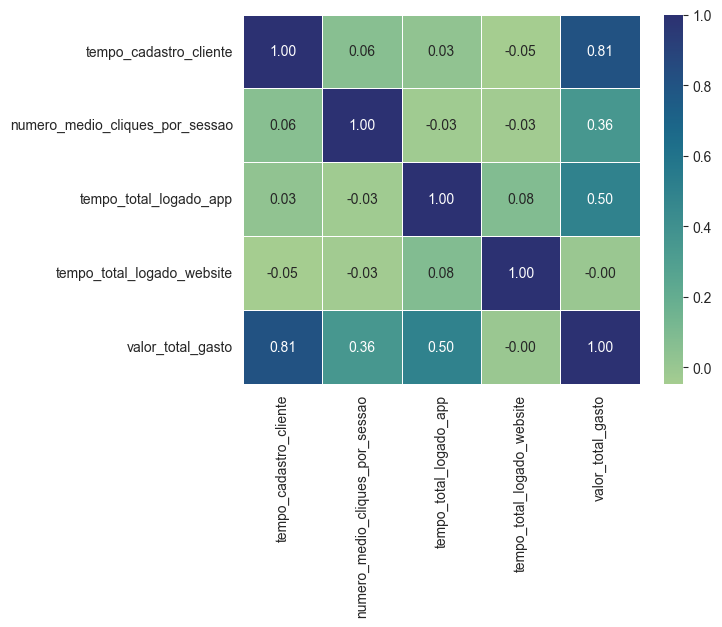

In [7]:
corr_df = dados.corr()
sns.heatmap(corr_df, annot = True, cmap = 'crest', fmt = '.2f', linewidth=.5)

**Análise Exploratória 1 - Relação entre tempo logado e valor gasto**

Primeiro, vamos começar verificando o tempo logado no website.

<Figure size 1800x1200 with 0 Axes>

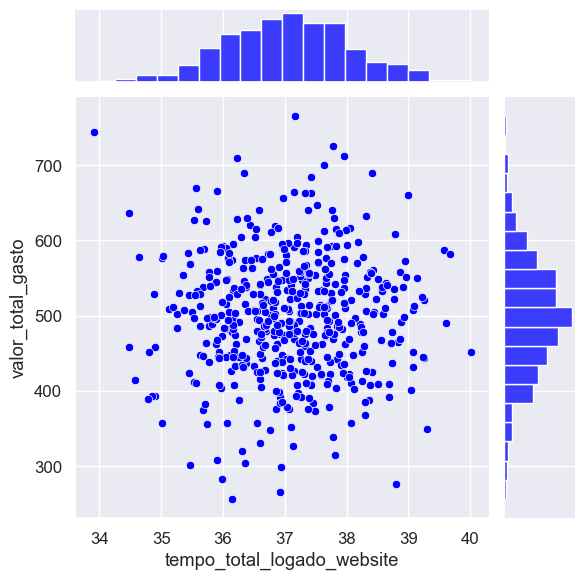

In [8]:
# Plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,                            # junta histograma e gráfico de dispersão
              x = 'tempo_total_logado_website',
              y = 'valor_total_gasto',
              color = 'blue')

Nao parece haver relacionamento direto entre essas duas variáveis. Se o cliente passa mais tempo no site, ele não parece gastar mais.

In [9]:
# corr entre elas
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


De fato, correlação muito próxima de 0, o que indica nao haver correlação. 

Quem sabe o tempo logado no app tenha uma correlação maior? Vamos ver.

<Figure size 1800x1200 with 0 Axes>

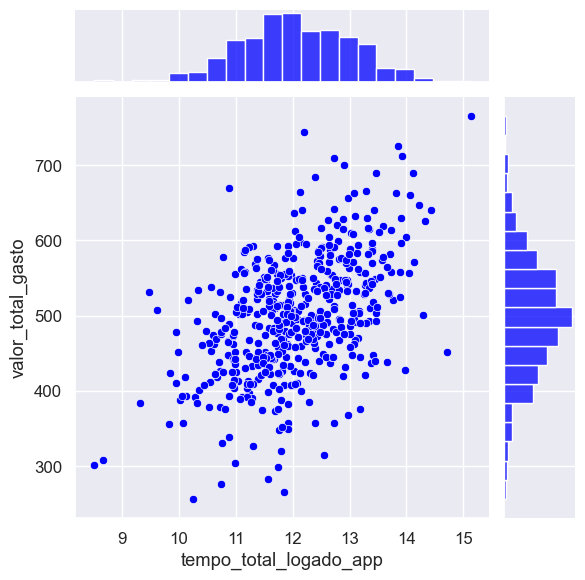

In [10]:
# Plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,                            # junta histograma e gráfico de dispersão
              x = 'tempo_total_logado_app',
              y = 'valor_total_gasto',
              color = 'blue')

Aqui já parece haver uma correlação positiva....

In [11]:
# corr entre elas
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


Correlação de 0.5, moderadamente positiva, o que é um indício de que há relaçao entre mais tempo logado no app e mais gastos 

**Análise Exploratória 2 - Relação entre tempo de cadastro e tempo logado**

<Figure size 1800x1200 with 0 Axes>

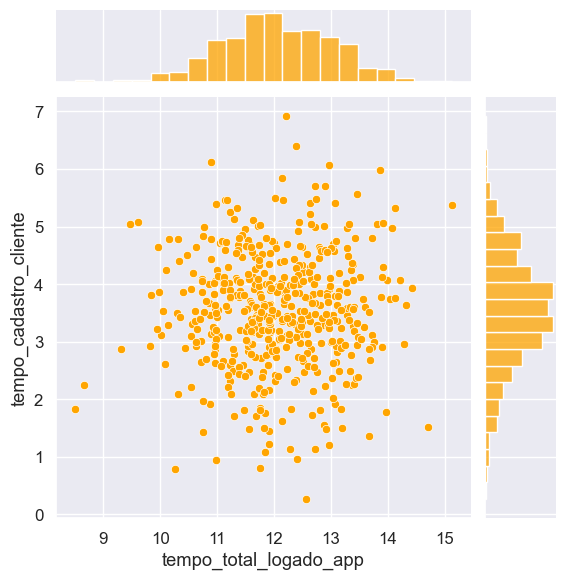

In [12]:
# Plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,                            # junta histograma e gráfico de dispersão
              x = 'tempo_total_logado_app',
              y = 'tempo_cadastro_cliente',
              color = 'orange')

Não parece haver correlação. Mas dá pra ver que clientes cadastrados a 3-4 anos passam aproximadamente 12~ minutos logados no app.

In [13]:
# corr entre elas
dados[['tempo_total_logado_app', 'tempo_cadastro_cliente']].corr()

,tempo_total_logado_app,tempo_cadastro_cliente
tempo_total_logado_app,1.000000,0.029143
tempo_cadastro_cliente,0.029143,1.000000


**Análise Exploratória 2 - Relação entre tempo de cadastro e valor gasto**

Vamos criar o modelo de regressão agora na análise exploratória. Não vai ser o modelo final, mas dá pra ter uma ideia através da função `sns.lmplot`

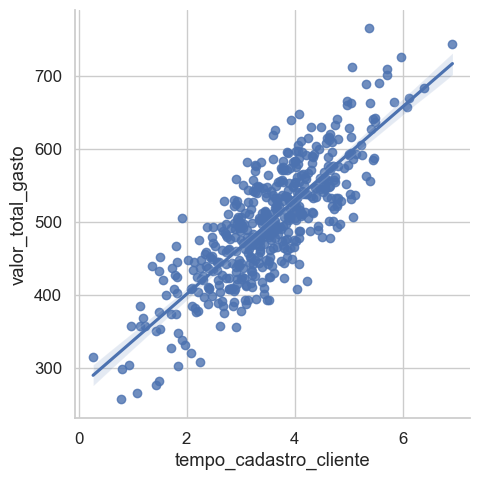

In [14]:
# Plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(dados, x = 'tempo_cadastro_cliente', y = 'valor_total_gasto')

Aqui enxergamos uma correlação bastante positiva. Mais tempo de cadastro = mais gastos.

A área sombreada ao redor da linha é a margem de erro, que é bem baixa

In [15]:
# corr entre elas
dados[['valor_total_gasto', 'tempo_cadastro_cliente']].corr()

,valor_total_gasto,tempo_cadastro_cliente
valor_total_gasto,1.000000,0.809084
tempo_cadastro_cliente,0.809084,1.000000


Correlação altíssima. Talvez o mais inteligente seria reter os clientes, e não se preocupar mais com site ou app.

**Análise Exploratória - Relação entre tempo logado no app vs no website**

<Figure size 1800x1200 with 0 Axes>

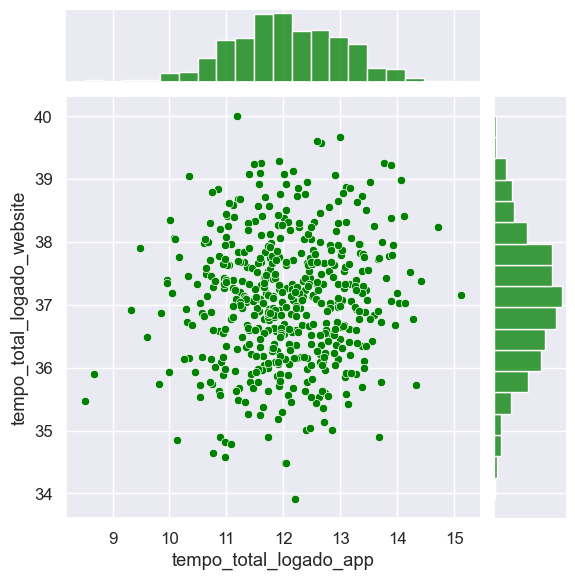

In [16]:
# Plot
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,                            # junta histograma e gráfico de dispersão
              x = 'tempo_total_logado_app',
              y = 'tempo_total_logado_website',
              color = 'green')

Parece não haver correlação.

In [17]:
# corr entre elas
dados[['tempo_total_logado_app', 'tempo_total_logado_website']].corr()

,tempo_total_logado_app,tempo_total_logado_website
tempo_total_logado_app,1.000000,0.082388
tempo_total_logado_website,0.082388,1.000000


**Pré-processamento dos dados para construção de modelos de ML**

A seguir, vamos dividir variáveis preditoras e alvo; e dados de teste e treino

In [18]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [19]:
# divisão das variáveis
y = dados['valor_total_gasto']

x = dados[['tempo_cadastro_cliente', 
            'numero_medio_cliques_por_sessao',
            'tempo_total_logado_app',
            'tempo_total_logado_website']]

In [20]:
# divisão em teste/treino

# se formos observar, o train_test_split retorna 4 objetos. por isso precisamos armazenar cada coisa junto da função
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=101)

**Padronização de dados**

Os dados estão praticamente na mesma escala, mas é importante fazer a padronização.

O pacote StandardScaler é uma classe em python, armazenada em um objeto. Eu aplico dados de treino nesse objeto e depois uso ele pra alterar os dados de treino e teste

In [21]:
# criando o scaler
scaler = StandardScaler()

In [22]:
# treinando o scaler
scaler.fit(x_treino)

StandardScaler()

In [23]:
# Aplicando o scaler aos dados
x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

In [24]:
x_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

#### **Compreendendo o Aprendizado de Modelos de Regressão**

O modelo de regressão serve para prever os dados. O modelo encontra o relacionamento entre os dados e traz uma previsão.

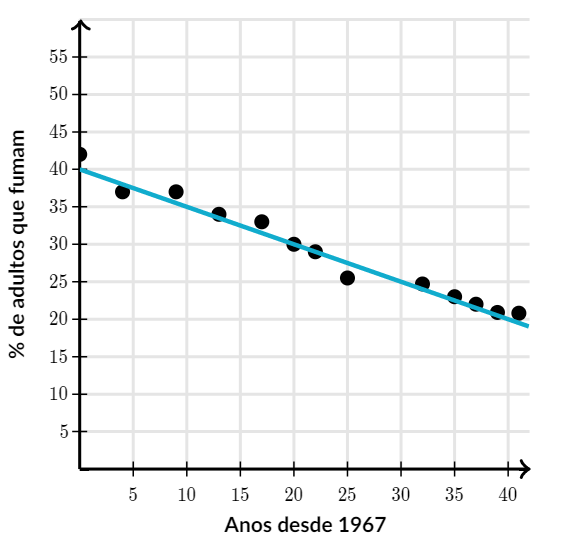

A regressão linear tem uma fórmula, que é composta por diferentes *coeficientes*:
- (a) intercepto: só ver o ponto y que a reta passa quando x é 0. nesse caso, é (0, 40), então o intercepto é 40.

- (b) coeficiente angular: se a reta passa por (0,40) e (10,35), então o coeficiente angular é a subtração de x com x e y com y

    35-40 / 10 - 0 = -0.5

**pra definir a reta, é só fazer y = a + bx >> y = 40 + (-0.5)x**

Na regressão linear múltipla, temos várias variáveis. Na simples, apenas uma.

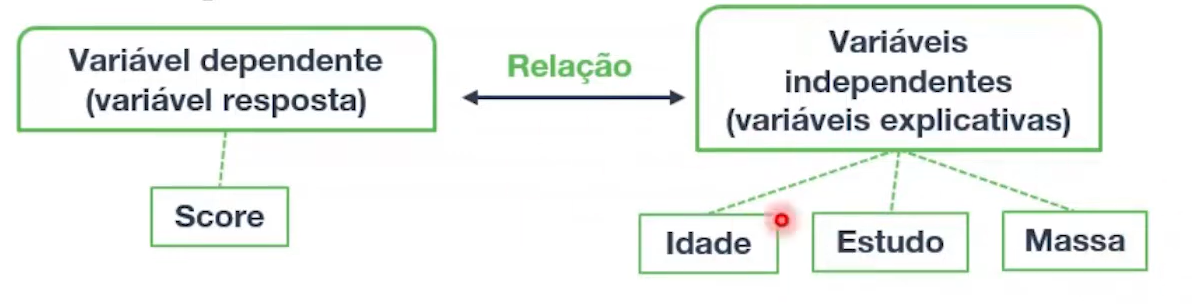

A fórmula é:

- (a) intercepto: só ver o ponto y que a reta passa quando x é 0. nesse caso, é (0, 40), então o intercepto é 40.

- (b) coeficiente angular: se a reta passa por (0,40) e (10,35), então o coeficiente angular é a subtração de x com x e y com y

- (x) comstante da variável, a ser substituída por um valor em cada ponto

- (e) erro-padrão

**y = a + b1x1 + b2x2 .... + e**


In [25]:
# Cria o modelo
# esse objeto 'modelo_v1' é uma instância da classe LinearRegression().
# Pra que tenhamos o modelo final, precisamos treinar o objeto.
modelo_v1 = LinearRegression()

In [26]:
# Agora, treinamos o objeto
modelo_v1.fit(x_treino, y_treino)

LinearRegression()

In [27]:
# E para descobrirmos os coeficientes:
# obs: aqui o slope (intercepto) não aparece.
print('Os coeficientes são: \n',
    '\n b1 ',modelo_v1.coef_[0],
    '\n b2 ',modelo_v1.coef_[1],
    '\n b3 ',modelo_v1.coef_[2],
    '\n b4 ',modelo_v1.coef_[3])

Os coeficientes são: 
 
 b1  63.74220715689191 
 b2  26.23901605523608 
 b3  38.57185550589678 
 b4  0.6847366049059538


In [28]:
# Olhando isso atrelado aos nomes das variáveis:
df_coef = pd.DataFrame(modelo_v1.coef_, x.columns, columns = [['coeficientes']])
df_coef

,coeficientes
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


In [29]:
# Previsões do modelo
pred_v1 = modelo_v1.predict(x_teste)
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

Text(0, 0.5, 'Valor previsto de y')

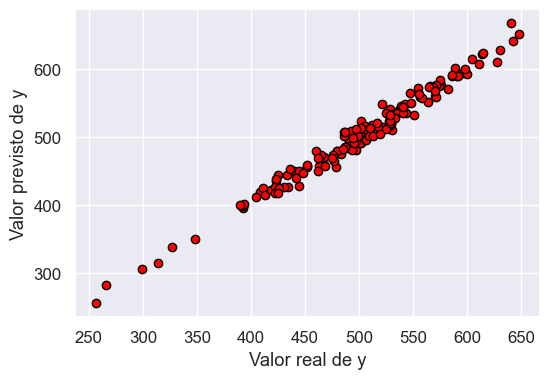

In [30]:
# Vamos plotar um gráfico para ver o quanto o modelo se aproxima dos dados reais de y
plt.figure(figsize=(6,4))
plt.scatter(x = y_teste, y = pred_v1, c = 'red', edgecolors='black')
plt.xlabel('Valor real de y')
plt.ylabel('Valor previsto de y')

Essa visualização indica que o modelo está muito bom e tem uma boa taxa de acertos.

Vamos calcular algumas métricas que podem indicar essa performance.

##### **Métricas**

Essas são as métricas simples que vão ser base pra nossa análise

In [31]:
dados['valor_total_gasto'].describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: valor_total_gasto, dtype: float64

**Análise de métricas**

**MAE (Mean Absolute Error)**

O erro médio absoluto (MAE) prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 7,76 reais, o que é um valor pequeno comparado ao valor médio gasto por cliente.

Esse 7,76 é o e (erro) lá da fórmula da reg. lin. múlt.

In [32]:
# MAE
mean_absolute_error(y_teste,pred_v1)

7.762418645778983

**MSE (Mean Squared Error)**, Erro Quadrático Médio

Ele não é o ideal para fazer a análise da performance do modelo, mas mesmo assim vamos puxar o resultado dele.

In [33]:
# MSE
mean_squared_error(y_teste,pred_v1)

94.95654308438668

**RMSE (Root Mean Squared Error)**, Raiz Quadrada do Erro Quadrático Médio

O RMSE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 9,74, que é um valor pequeno comparado ao valor gasto médio por cliente

In [34]:
#RMSE
np.sqrt(mean_squared_error(y_teste,pred_v1))

9.74456479707466

**Coeficiente R2**

Valor numérico que vai de 0 a 1. Quanto maior, melhor. 

Ele responde se o modelo ajusta bem os dados. No nosso, obtivemos 0,98, quase perfeito.

In [35]:
# R2
r2_score(y_teste, pred_v1)

0.9813622791776302

**Variância**

A variância dos pontos de dados reais em relação à reta é a variância. É uma das medidas de dispersão, que mostra o comportamento dos dados de uma amostra em relação a uma medida central (no caso, as previsões do nosso modelo)

Quanto maior a variância, mais o modelo é capaz de detectar o padrão dos dados. Nosso modelo obteve 0,98, o que é ótimo também.

In [36]:
explained_variance_score(y_teste, pred_v1)

0.9817449183428639

##### **A importância dos resíduos**

O resíduo representa a quantidade da variabilidade que Y que o modelo ajustado não consegue explicar. É aquela diferença entre a previsão de y e o valor real dele.

No caso do nosso dataset, isso se aproxima bastante de uma dist. normal.

<Figure size 800x600 with 0 Axes>

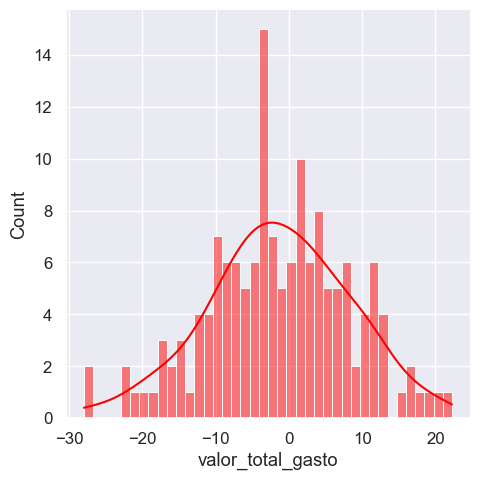

In [37]:
# Plot
plt.figure(figsize=(8,6))
ax = sns.displot((y_teste - pred_v1),
                bins = 40,
                color = 'red',
                kde = True)


### **Modelo de ML usando Regressão Ridge**

Ao construir um modelo de ML, é importante compará-lo a outros construídos. Por isso, vamos construir um novo usando a Regressão Ridge, que usa uma regularização de resultado, o que é útil quando quero reduzir **overfitting**. 

Acrescentamos um elemento matemático para isso, um alpha.

In [38]:
# Cria o modelo
modelo_v2 = Ridge(alpha=1.0)

In [39]:
# Treino o modelo
modelo_v2.fit(x_treino, y_treino)

Ridge()

In [40]:
# Puxo suas previsões
pred_v2 = modelo_v2.predict(x_teste)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

Os valores dos coeficientes tão bem próximos dos valores do modelo v1.

In [41]:
# Trazemos os coeficientes atrelados às variáveis
df_coef = pd.DataFrame(modelo_v2.coef_, x.columns, columns = [['coeficientes']])
df_coef


,coeficientes
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


O plot também. Bem próximo dos dados reais.

Text(0, 0.5, 'Valor previsto de y')

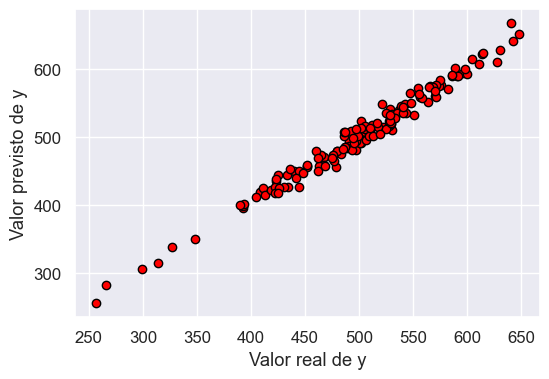

In [42]:
# Vamos plotar um gráfico para ver o quanto o modelo se aproxima dos dados reais de y
plt.figure(figsize=(6,4))
plt.scatter(x = y_teste, y = pred_v2, c = 'red', edgecolors='black')
plt.xlabel('Valor real de y')
plt.ylabel('Valor previsto de y')

In [43]:
# criei uma função pra agilizar os cálculos de métricas
def teste_perf(yteste, ypred):
    MAE = mean_absolute_error(yteste, ypred)
    MSE = mean_squared_error(yteste, ypred)
    RMSE = np.sqrt(mean_absolute_error(yteste, ypred))
    R2_SCORE = r2_score(yteste, ypred)
    EXP_VAR = explained_variance_score(yteste, ypred)

    print('MAE: ',        MAE,
          '\n MSE:',      MSE,
          '\n RMSE: ',    RMSE,
          '\n R2_SCORE',  R2_SCORE,
          '\n EXP_VAR: ', EXP_VAR  )
    return pd.DataFrame([[MAE, MSE, RMSE, R2_SCORE, EXP_VAR]])



In [70]:
# Vamos testar a performance do modelo_v2 e juntar os dados 
results_v2 = teste_perf(y_teste, pred_v2)
results_v1 = teste_perf(y_teste, pred_v1)

results_v1.set_axis(["MAE", "MSE", "RMSE", "R2_SCORE", "EXP_VAR"], axis = 'columns', inplace= True)
results_v1.set_axis(["modelo_v1"], axis = 'index', inplace= True)

results_v2.set_axis(["MAE", "MSE", "RMSE", "R2_SCORE", "EXP_VAR"], axis = 'columns', inplace= True)
results_v2.set_axis(["modelo_v2"], axis = 'index', inplace= True)

results = results_v1.append(results_v2)
results


MAE:  7.764151148981961 
 MSE: 94.93731602493467 
 RMSE:  2.7864226436386064 
 R2_SCORE 0.981366052994101 
 EXP_VAR:  0.9817472659016085
MAE:  7.762418645778983 
 MSE: 94.95654308438668 
 RMSE:  2.786111743232669 
 R2_SCORE 0.9813622791776302 
 EXP_VAR:  0.9817449183428639


,MAE,MSE,RMSE,R2_SCORE,EXP_VAR
modelo_v1,7.762419,94.956543,2.786112,0.981362,0.981745
modelo_v2,7.764151,94.937316,2.786423,0.981366,0.981747


<Figure size 800x600 with 0 Axes>

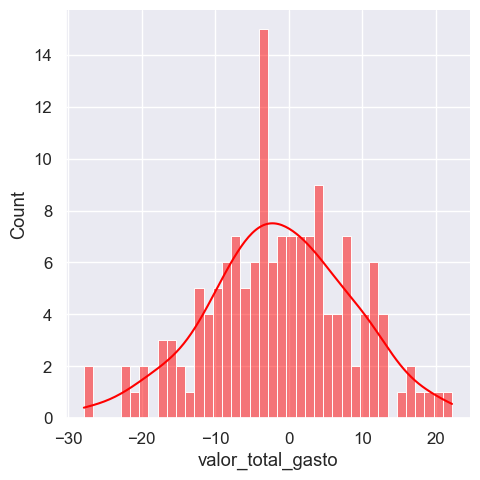

In [45]:
# Plot do resíduo do modelo
# Plot
plt.figure(figsize=(8,6))
ax = sns.displot((y_teste - pred_v2),
                bins = 40,
                color = 'red',
                kde = True)


### **Modelo de ML usando Regressão Lasso**

Em que momento a gente para de construir modelos? Isso depende.

O que pode ditar isso é a definição de uma métrica razoável, como por exemplo uma taxa de erros RMSE de 6. Ao alcançar essa meta, podemos nos dar por satisfeitos.

Cada algoritmo de ML possui múltiplas variações de parâmetros, e isso pode ser explorado. A regressão por exemplo apresenta variações Ridge e Lasso.


In [46]:
# cria o modelo
modelo_v3 = Lasso(alpha=1.0)

In [48]:
# treina o modelo
modelo_v3.fit(x_treino, y_treino)

Lasso()

In [51]:
# Traz as previsões
pred_v3 = modelo_v3.predict(x_teste)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

In [55]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v3.coef_, x.columns, columns=['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


Text(0, 0.5, 'Valor previsto de y')

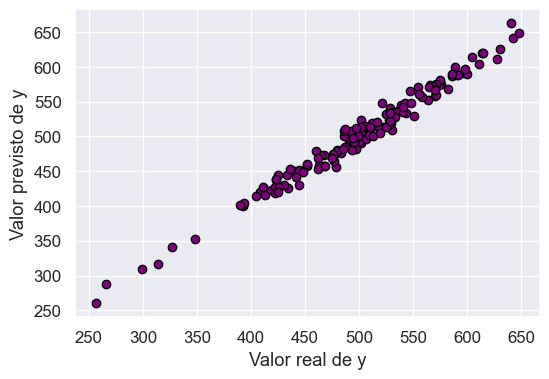

In [56]:
# Vamos plotar um gráfico para ver o quanto o modelo se aproxima dos dados reais de y
plt.figure(figsize=(6,4))
plt.scatter(x = y_teste, y = pred_v3, c = 'purple', edgecolors='black')
plt.xlabel('Valor real de y')
plt.ylabel('Valor previsto de y')

In [71]:
# traz os resultados
results_v3 = teste_perf(y_teste, pred_v3)

results_v3.set_axis(["MAE", "MSE", "RMSE", "R2_SCORE", "EXP_VAR"], axis = 'columns', inplace= True)
results_v3.set_axis(["modelo_v3"], axis = 'index', inplace= True)

MAE:  7.7885046969510645 
 MSE: 96.05606348970672 
 RMSE:  2.790789260576847 
 R2_SCORE 0.981146469358873 
 EXP_VAR:  0.9815600649101045


In [76]:
results = results.append(results_v3)
results

,MAE,MSE,RMSE,R2_SCORE,EXP_VAR
modelo_v1,7.762419,94.956543,2.786112,0.981362,0.981745
modelo_v2,7.764151,94.937316,2.786423,0.981366,0.981747
modelo_v3,7.788505,96.056063,2.790789,0.981146,0.981560


<Figure size 800x600 with 0 Axes>

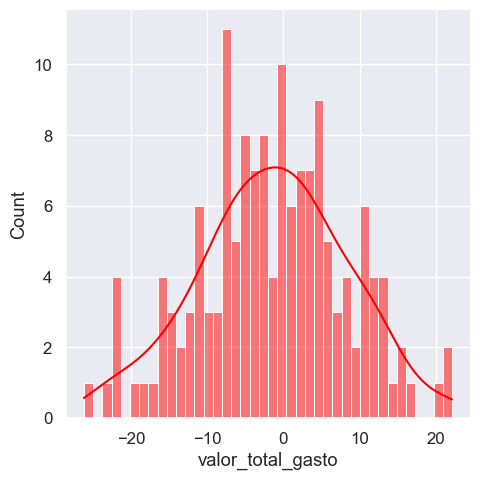

In [77]:
# Plot do resíduo do modelo
# Plot
plt.figure(figsize=(8,6))
ax = sns.displot((y_teste - pred_v3),
                bins = 40,
                color = 'red',
                kde = True)

#### **Selecionando o modelo**

O modelo 3 apresentou uma RMSE levemente maior e deve ser descartado. Os modelos 1 e 2 ficaram próximos e nesse caso devemos escolher o modelo mais simples, que em nosso exemplo é o modelo 1.

É sempre mais fácil explicar os resultados de um modelo mais simples.

No nosso modelo, o padrão encontrado está nos coeficientes. E isso é fácil de ser encontrado nos modelos de Regressão.

In [81]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v1.coef_, x.columns, columns=['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


Nosso objetivo é prever a variável-alvo `valor_total_gasto`. Interpretando os coeficientes, eles nos dizem:

- Um aumentando de 1 unidade no **Tempo de Cadastro**, está associado a um aumento de R$63,74 no `valor_total_gasto` do cliente por mês. 

- Um aumentando de 1 unidade no **Número Médio de Cliques por Sessão**, está associado a um aumento de R$26,23 no `valor_total_gasto` do cliente por mês. 

- Um aumentando de 1 unidade no **Tempo Logado no App**, está associado a um aumento de R$38,57 no `valor_total_gasto` do cliente por mês. 

- Um aumentando de 1 unidade no **Tempo Logado no Website**, está associado a um aumento de R$0,68 no `valor_total_gasto` do cliente por mês. 

Compensa investir no Website? Não, o ganho é mínimo.

Compensa investir no app? Sim, pra cada aumento de 1 unidade no tempo logado, pode haver um aumento de R$38,57. 

Mesmo assim, o aumento na retenção do cliente (a partir da variável **Tempo de Cadastro**) se mostra como a ação mais rentável.